# Cargamos las librerias necesarias

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Leemos los datos de temperaturas

Los datos de temperaturas vienen de AEMET de una base de datos del trabajo, los datos los extraigo desde el notebook 'Temperaturas_SGE'. Para no tener problemas con la base de datos descargamos los datos en dos grupos, por un lado 2017 y por otro 2018

In [52]:
Temperaturas_2017 = pd.read_csv('./data/medidas_temp_2017.csv', sep=';', 
                                encoding='cp1252', 
                                parse_dates=["Fecha"],
                                index_col=False)
Temperaturas_2017.dtypes

Fecha          datetime64[ns]
Localidad              object
Temperatura            object
dtype: object

Comprobamos que tenemos todas las columnas rellenas y que no hay NaN

In [53]:
Temperaturas_2017.isnull().any().any()

False

In [54]:
Temperaturas_2017.head(5)

,Fecha,Localidad,Temperatura
0,2017-01-11 07:00:00,A Coruña-Cambre,"11,0"
1,2017-01-11 07:00:00,A Coruña-Culleredo,"11,0"
2,2017-01-11 07:00:00,Albacete-Albacete,"4,0"
3,2017-01-11 07:00:00,Albacete-Chinchilla de Monte-Aragón,"3,0"
4,2017-01-11 07:00:00,Badajoz-Badajoz,"5,0"


Para pasar los datos de la columna Temperatura a números, les voy a quitar el decimal, ya que en realidad ningún dato trae decimales, y le voy a dar formato de número entero a esa columna.

In [55]:
Temperaturas_2017['Temperatura']=Temperaturas_2017['Temperatura'].str.split(',0', expand=True)

In [56]:
Temperaturas_2017.dtypes

Fecha          datetime64[ns]
Localidad              object
Temperatura            object
dtype: object

In [57]:
Temperaturas_2017['Temperatura']=Temperaturas_2017['Temperatura'].astype(int)

In [58]:
Temperaturas_2017.head()

,Fecha,Localidad,Temperatura
0,2017-01-11 07:00:00,A Coruña-Cambre,11
1,2017-01-11 07:00:00,A Coruña-Culleredo,11
2,2017-01-11 07:00:00,Albacete-Albacete,4
3,2017-01-11 07:00:00,Albacete-Chinchilla de Monte-Aragón,3
4,2017-01-11 07:00:00,Badajoz-Badajoz,5


In [59]:
Temperaturas_2017.dtypes

Fecha          datetime64[ns]
Localidad              object
Temperatura             int64
dtype: object

### Hacemos lo mismo con el fichero de 2018

In [60]:
Temperaturas_2018 = pd.read_csv('./data/medidas_temp_2018.csv', sep=';', encoding='cp1252', parse_dates=["Fecha"],index_col=False)
Temperaturas_2018.dtypes


Fecha          datetime64[ns]
Localidad              object
Temperatura            object
dtype: object

In [61]:
Temperaturas_2018.isnull().any().any()

False

In [62]:
Temperaturas_2018['Temperatura']=Temperaturas_2018['Temperatura'].str.split(',0', expand=True)
Temperaturas_2018['Temperatura']=Temperaturas_2018['Temperatura'].astype(int)
Temperaturas_2018.dtypes

Fecha          datetime64[ns]
Localidad              object
Temperatura             int64
dtype: object

# Procesado de los ficheros de temperaturas

### Ya tenemos tanto el data set con las temperaturas de 2017 como las de 2018.

A continuacíón vamos a unir ambos data set para tener uno solo, vamos a tratar la columna de Localidad y vamos a hacer la media de las temperaturas por comunidad para tenerlo al mismo nivel que tenemos el data set de Medidas.

In [63]:
Temperaturas = pd.concat([Temperaturas_2017, Temperaturas_2018])

Temperaturas.head(5)

,Fecha,Localidad,Temperatura
0,2017-01-11 07:00:00,A Coruña-Cambre,11
1,2017-01-11 07:00:00,A Coruña-Culleredo,11
2,2017-01-11 07:00:00,Albacete-Albacete,4
3,2017-01-11 07:00:00,Albacete-Chinchilla de Monte-Aragón,3
4,2017-01-11 07:00:00,Badajoz-Badajoz,5


In [64]:
Temperaturas.dtypes

Fecha          datetime64[ns]
Localidad              object
Temperatura             int64
dtype: object

Vamos a validar que los datos tienen sentido y que no tengo outliers en las temperaturas.

In [65]:
Temperaturas.describe()

,Temperatura
count,27434.000000
mean,7.036961
std,4.711471
min,-8.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,21.000000


In [66]:
Temperaturas['Fecha']=pd.to_datetime(Temperaturas['Fecha'], yearfirst=True,format='%Y-%m-%d %H:%M:%S')

In [67]:
Temperaturas.head(5)

,Fecha,Localidad,Temperatura
0,2017-01-11 07:00:00,A Coruña-Cambre,11
1,2017-01-11 07:00:00,A Coruña-Culleredo,11
2,2017-01-11 07:00:00,Albacete-Albacete,4
3,2017-01-11 07:00:00,Albacete-Chinchilla de Monte-Aragón,3
4,2017-01-11 07:00:00,Badajoz-Badajoz,5


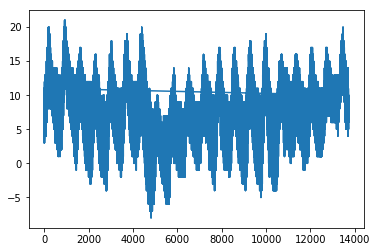

In [68]:
plt.plot(Temperaturas['Temperatura'])

In [69]:
str.split?

Docstring:
S.split(sep=None, maxsplit=-1) -> list of strings

Return a list of the words in S, using sep as the
delimiter string.  If maxsplit is given, at most maxsplit
splits are done. If sep is not specified or is None, any
whitespace string is a separator and empty strings are
removed from the result.
Type:      method_descriptor


Vamos a crear una nueva Columna en nuestro data set, en un principio será la misma que la Localidad, y desués utilizaremos la función str.split para quedarnos solo con la provincia aprovechando que está separada en todos casos por un guión (-).

In [70]:
Temperaturas['Provincia']=Temperaturas['Localidad']

In [71]:
Temperaturas['Provincia']=Temperaturas['Localidad'].str.split('-', 1, expand=True)

In [72]:
Temperaturas.head(5)

,Fecha,Localidad,Temperatura,Provincia
0,2017-01-11 07:00:00,A Coruña-Cambre,11,A Coruña
1,2017-01-11 07:00:00,A Coruña-Culleredo,11,A Coruña
2,2017-01-11 07:00:00,Albacete-Albacete,4,Albacete
3,2017-01-11 07:00:00,Albacete-Chinchilla de Monte-Aragón,3,Albacete
4,2017-01-11 07:00:00,Badajoz-Badajoz,5,Badajoz


In [73]:
Temperaturas=Temperaturas.groupby(['Provincia', 'Fecha']).mean()
Temperaturas=Temperaturas_2.reset_index()


Temperaturas.head(10)

,index,Provincia,Fecha,Temperatura
0,0,Albacete,2017-01-11 07:00:00,3.5
1,1,Albacete,2017-01-11 08:00:00,4.0
2,2,Albacete,2017-01-11 09:00:00,4.5
3,3,Albacete,2017-01-11 10:00:00,5.5
4,4,Albacete,2017-01-11 11:00:00,7.0
5,5,Albacete,2017-01-11 12:00:00,8.5
6,6,Albacete,2017-01-11 13:00:00,8.5
7,7,Albacete,2017-01-11 14:00:00,9.5
8,8,Albacete,2017-01-11 15:00:00,9.5
9,9,Albacete,2017-01-11 16:00:00,9.0


In [74]:
Temperaturas.drop('index', 1, inplace=True)

In [75]:
Temperaturas.head(5)

,Provincia,Fecha,Temperatura
0,Albacete,2017-01-11 07:00:00,3.5
1,Albacete,2017-01-11 08:00:00,4.0
2,Albacete,2017-01-11 09:00:00,4.5
3,Albacete,2017-01-11 10:00:00,5.5
4,Albacete,2017-01-11 11:00:00,7.0


In [76]:
Comunidades=pd.read_excel('./data/Comunidades.xlsx')
Comunidades.head(5)

,Provincia,Comunidad
0,Albacete,Castilla la Mancha
1,Alicante,Comunidad Valenciana
2,Almería,Andalucía
3,Badajoz,Extremadura
4,Barcelona,Cataluña


In [77]:
Temperaturas = pd.merge(Temperaturas, Comunidades, on='Provincia')
Temperaturas.head(5)

,Provincia,Fecha,Temperatura,Comunidad
0,Albacete,2017-01-11 07:00:00,3.5,Castilla la Mancha
1,Albacete,2017-01-11 08:00:00,4.0,Castilla la Mancha
2,Albacete,2017-01-11 09:00:00,4.5,Castilla la Mancha
3,Albacete,2017-01-11 10:00:00,5.5,Castilla la Mancha
4,Albacete,2017-01-11 11:00:00,7.0,Castilla la Mancha


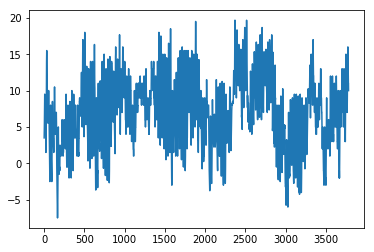

In [78]:
plt.plot(Temperaturas_2['Temperatura'])

In [79]:
Temperaturas.to_csv('Temperaturas.csv')